# مقدمة في الاحتمالات والإحصاء
في هذا الدفتر، سنستعرض بعض المفاهيم التي ناقشناها سابقًا. العديد من المفاهيم في الاحتمالات والإحصاء ممثلة بشكل جيد في المكتبات الرئيسية لمعالجة البيانات في بايثون، مثل `numpy` و `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## المتغيرات العشوائية والتوزيعات  
لنبدأ بأخذ عينة مكونة من 30 قيمة من توزيع منتظم بين 0 و 9. سنقوم أيضًا بحساب المتوسط والتباين.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


للتقدير بصريًا عدد القيم المختلفة الموجودة في العينة، يمكننا رسم **المدرج التكراري**:


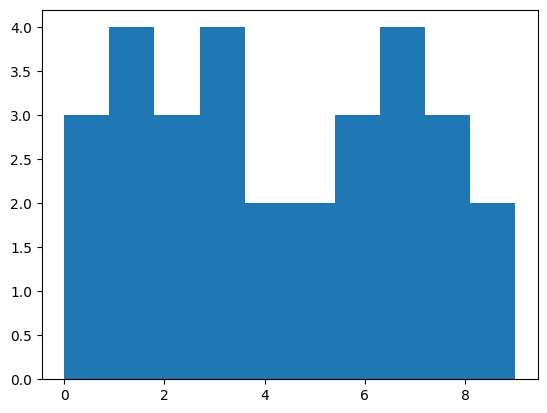

In [119]:
plt.hist(sample)
plt.show()

## تحليل البيانات الحقيقية

المتوسط والتباين مهمان جدًا عند تحليل البيانات الواقعية. دعونا نقوم بتحميل البيانات المتعلقة بلاعبي البيسبول من [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


نحن نستخدم هنا حزمة [**Pandas**](https://pandas.pydata.org/) لتحليل البيانات. سنتحدث أكثر عن Pandas والعمل مع البيانات في Python لاحقًا في هذه الدورة.

لنحسب القيم المتوسطة للعمر والطول والوزن:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

الآن دعونا نركز على الطول، ونحسب الانحراف المعياري والتباين:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


بالإضافة إلى المتوسط، من المنطقي النظر إلى القيمة الوسيطة والرباعيات. يمكن تصورها باستخدام **مخطط الصندوق**:


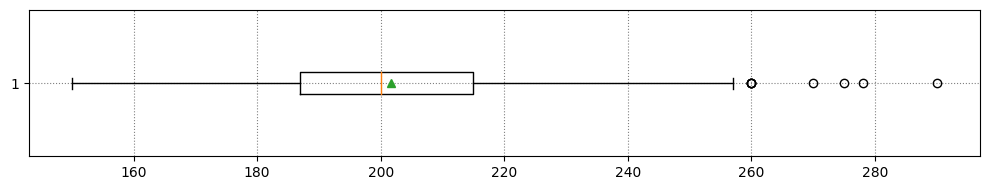

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

يمكننا أيضًا إنشاء مخططات الصندوق لمجموعات فرعية من مجموعة البيانات الخاصة بنا، على سبيل المثال، مجمعة حسب دور اللاعب.


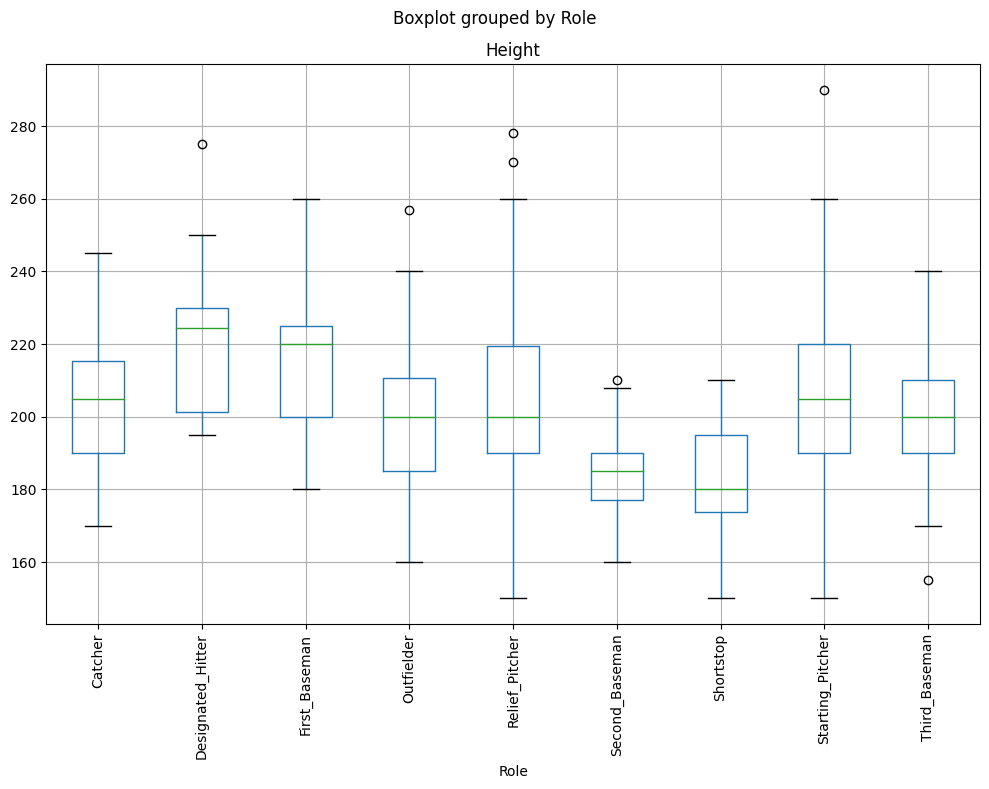

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **ملاحظة**: يشير هذا الرسم البياني إلى أن متوسط أطوال لاعبي القاعدة الأولى أعلى من متوسط أطوال لاعبي القاعدة الثانية. لاحقًا سنتعلم كيفية اختبار هذه الفرضية بشكل أكثر رسمية، وكيفية إثبات أن بياناتنا ذات دلالة إحصائية لتوضيح ذلك.

العمر، الطول، والوزن جميعها متغيرات عشوائية مستمرة. ما رأيك في توزيعها؟ طريقة جيدة لمعرفة ذلك هي رسم المدرج التكراري للقيم:


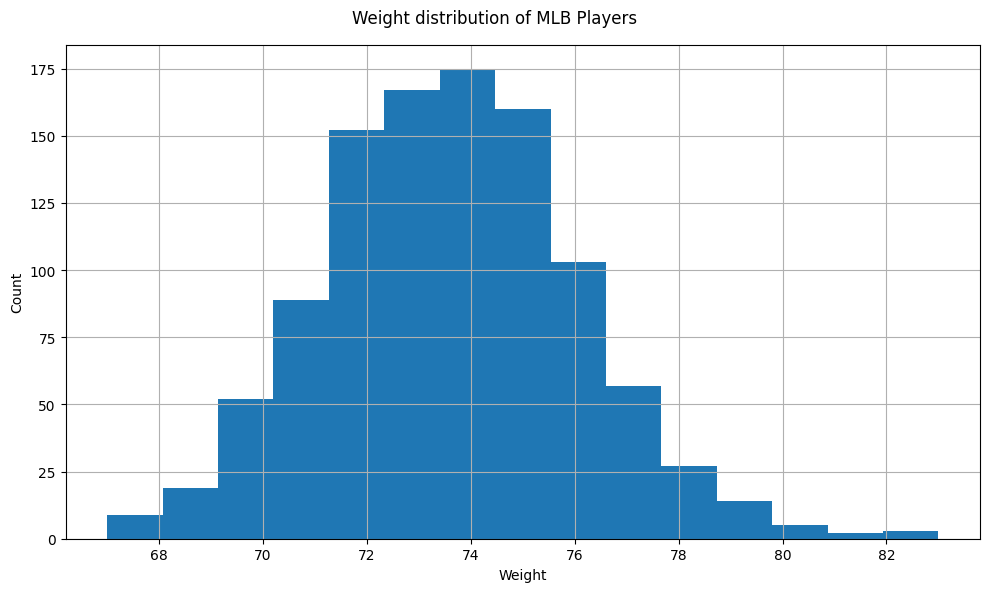

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## التوزيع الطبيعي

لنقم بإنشاء عينة اصطناعية للأوزان تتبع توزيعًا طبيعيًا بنفس المتوسط والتباين مثل بياناتنا الحقيقية:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

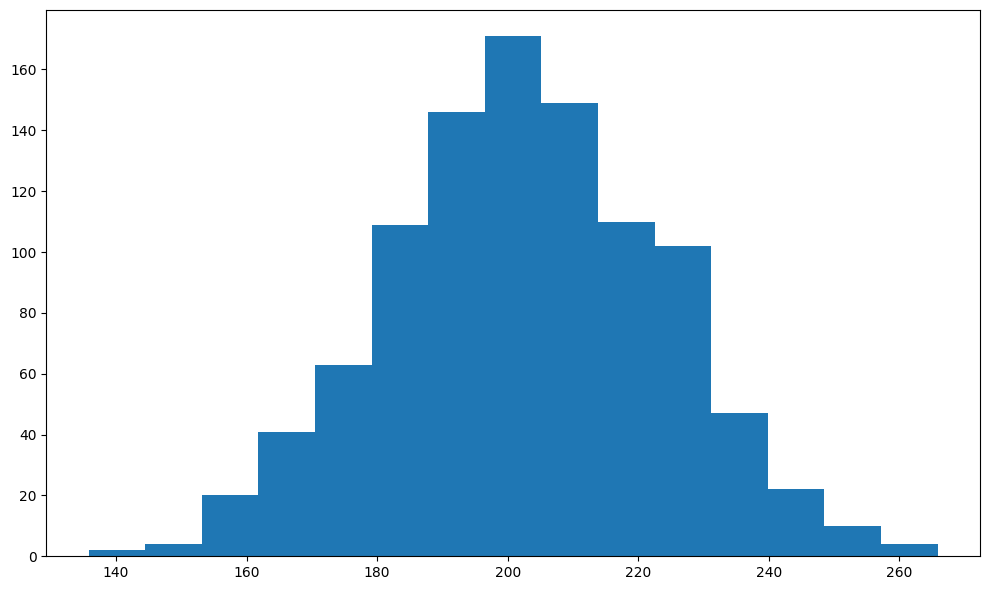

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

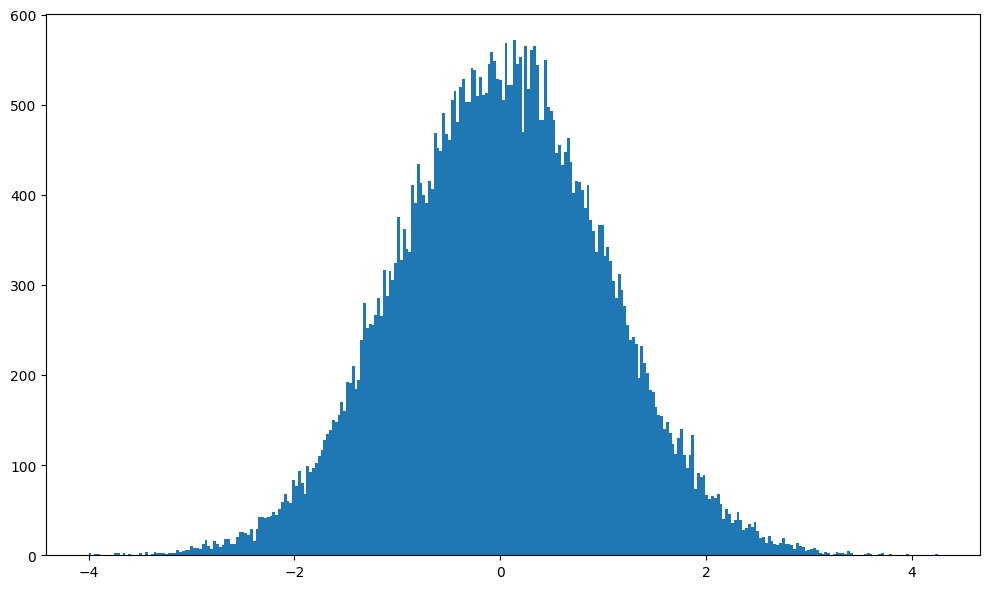

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

نظرًا لأن معظم القيم في الحياة الواقعية تتبع التوزيع الطبيعي، يجب علينا عدم استخدام مولد أرقام عشوائية بتوزيع منتظم لتوليد بيانات العينة. إليك ما يحدث إذا حاولنا توليد أوزان بتوزيع منتظم (تم توليدها بواسطة `np.random.rand`):


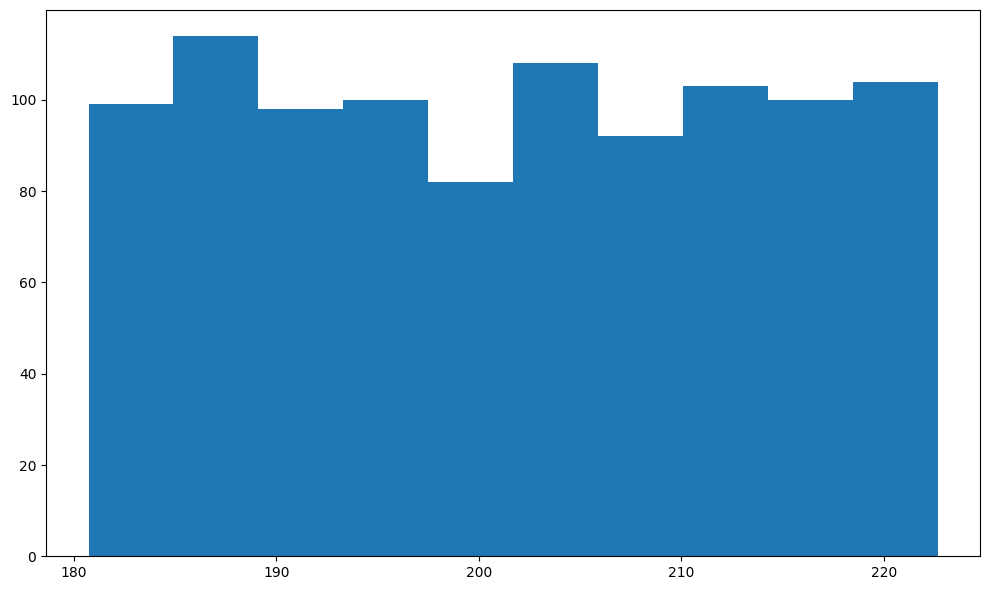

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## فترات الثقة

لنحسب الآن فترات الثقة لأوزان وأطوال لاعبي البيسبول. سنستخدم الكود [من هذا النقاش على StackOverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## اختبار الفرضيات

دعونا نستكشف الأدوار المختلفة في مجموعة بيانات لاعبي البيسبول لدينا:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

دعونا نختبر الفرضية التي تقول إن لاعبي القاعدة الأولى أطول من لاعبي القاعدة الثانية. أبسط طريقة للقيام بذلك هي اختبار فترات الثقة:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


يمكننا أن نرى أن الفترات الزمنية لا تتداخل.

طريقة أكثر دقة من الناحية الإحصائية لإثبات الفرضية هي استخدام **اختبار t لستودنت**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


القيمتان اللتان تُرجعان بواسطة دالة `ttest_ind` هما:  
* قيمة p يمكن اعتبارها احتمال أن يكون للتوزيعين نفس المتوسط. في حالتنا، هي منخفضة جدًا، مما يعني أن هناك دليلًا قويًا يدعم أن لاعبي القاعدة الأولى أطول.  
* قيمة t هي القيمة الوسيطة لاختلاف المتوسط المُطَبَّع التي تُستخدم في اختبار t، ويتم مقارنتها بقيمة عتبة معينة لمستوى ثقة محدد.  


## محاكاة التوزيع الطبيعي باستخدام نظرية الحد المركزي

المولد العشوائي الزائف في بايثون مصمم ليعطينا توزيعًا منتظمًا. إذا أردنا إنشاء مولد لتوزيع طبيعي، يمكننا استخدام نظرية الحد المركزي. للحصول على قيمة موزعة طبيعيًا، سنقوم فقط بحساب متوسط عينة تم إنشاؤها بتوزيع منتظم.


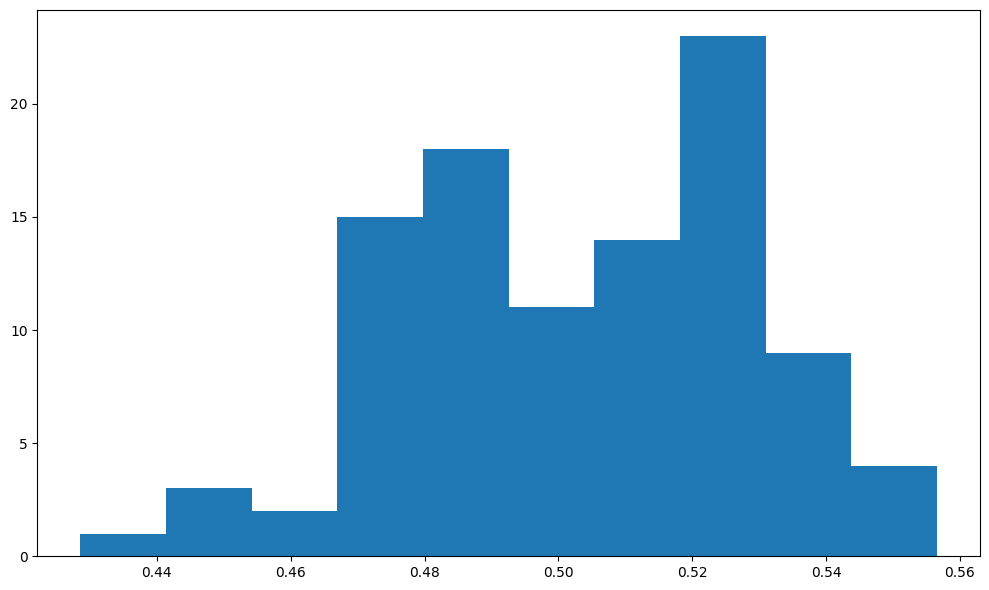

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## الارتباط وشركة البيسبول الشريرة

يسمح لنا الارتباط بإيجاد العلاقات بين تسلسلات البيانات. في مثالنا البسيط، دعونا نتخيل أن هناك شركة بيسبول شريرة تدفع للاعبيها بناءً على طولهم - كلما كان اللاعب أطول، حصل على أموال أكثر. لنفترض أن هناك راتباً أساسياً قدره 1000 دولار، ومكافأة إضافية تتراوح بين 0 و100 دولار، حسب الطول. سنأخذ لاعبين حقيقيين من MLB، ونحسب رواتبهم التخيلية:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


دعونا الآن نحسب التباين والارتباط لتلك التسلسلات. `np.cov` ستعطينا ما يسمى بـ **مصفوفة التباين**، وهي امتداد للتباين ليشمل متغيرات متعددة. العنصر $M_{ij}$ في مصفوفة التباين $M$ هو ارتباط بين المتغيرات المدخلة $X_i$ و $X_j$، والقيم القطرية $M_{ii}$ هي التباين لـ $X_{i}$. وبالمثل، `np.corrcoef` ستعطينا **مصفوفة الارتباط**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


يعني الارتباط الذي يساوي 1 أن هناك **علاقة خطية قوية** بين متغيرين. يمكننا رؤية العلاقة الخطية بصريًا من خلال رسم قيمة واحدة مقابل الأخرى:


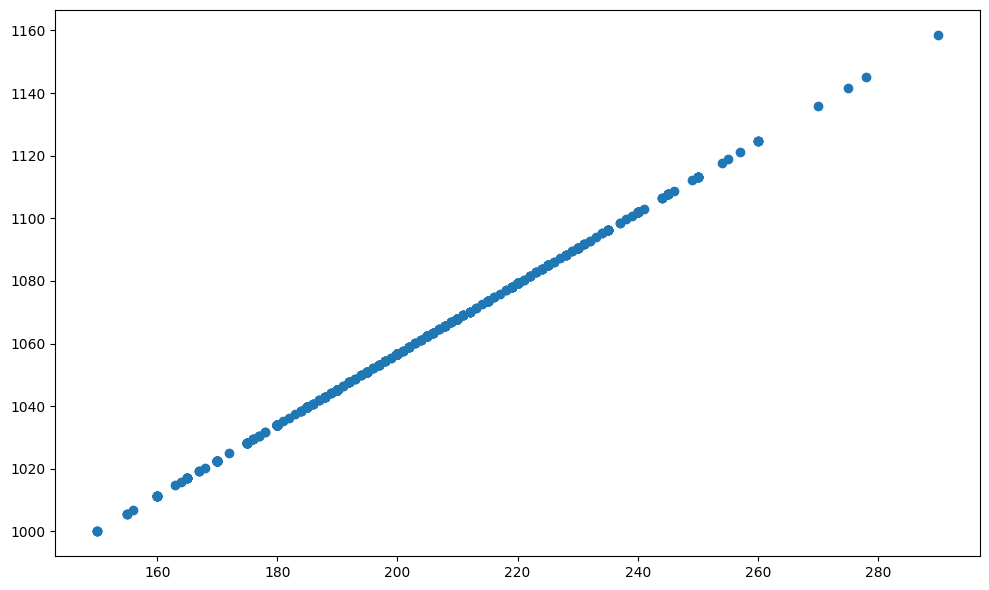

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

دعونا نرى ما يحدث إذا لم تكن العلاقة خطية. لنفترض أن شركتنا قررت إخفاء التبعية الخطية الواضحة بين الأطوال والرواتب، وأدخلت بعض اللاخطية في الصيغة، مثل `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


في هذه الحالة، الارتباط أصغر قليلاً، لكنه لا يزال مرتفعاً جداً. الآن، لجعل العلاقة أقل وضوحاً، قد نرغب في إضافة بعض العشوائية الإضافية عن طريق إضافة متغير عشوائي إلى الراتب. لنرَ ما سيحدث:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


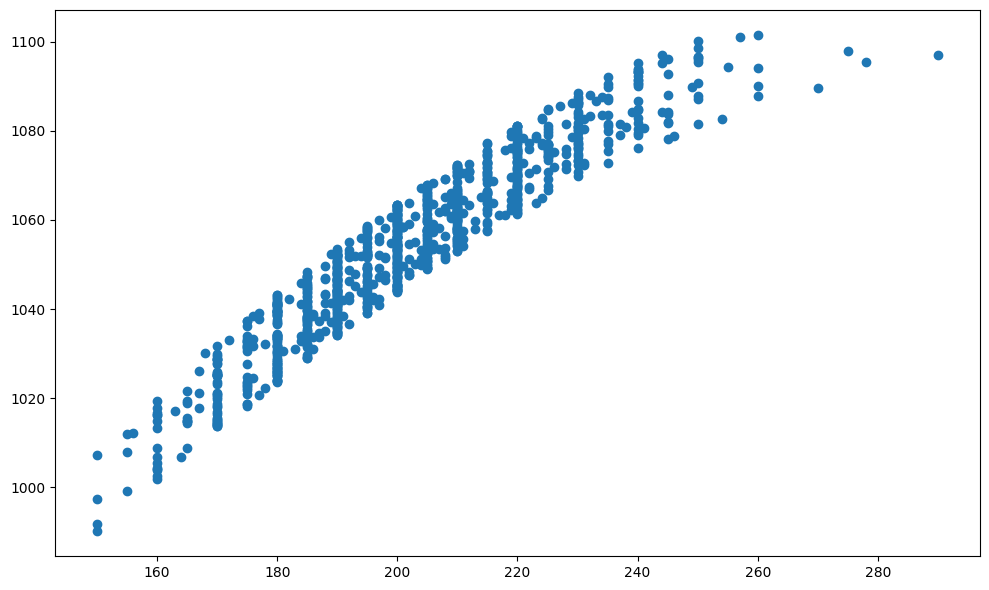

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> هل يمكنك أن تخمن لماذا تصطف النقاط في خطوط عمودية بهذا الشكل؟

لقد لاحظنا العلاقة بين مفهوم مصطنع مثل الراتب والمتغير الملاحظ *الطول*. دعونا أيضًا نرى ما إذا كان هناك ارتباط بين المتغيرين الملاحظين، مثل الطول والوزن:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

للأسف، لم نحصل على أي نتائج - فقط بعض القيم الغريبة `nan`. يعود السبب إلى أن بعض القيم في السلسلة غير معرفة، ممثلة بـ `nan`، مما يؤدي إلى أن تكون نتيجة العملية غير معرفة أيضًا. من خلال النظر إلى المصفوفة، يمكننا أن نرى أن العمود `Weight` هو العمود المسبب للمشكلة، لأن الارتباط الذاتي بين قيم `Height` قد تم حسابه.

> يوضح هذا المثال أهمية **تحضير البيانات** و**تنظيفها**. بدون بيانات مناسبة، لا يمكننا حساب أي شيء.

لنستخدم طريقة `fillna` لملء القيم المفقودة، ثم نحسب الارتباط:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

هناك بالفعل ارتباط، ولكنه ليس قويًا كما هو الحال في مثالنا الاصطناعي. في الواقع، إذا نظرنا إلى مخطط الانتشار لقيمة مقابل الأخرى، فستكون العلاقة أقل وضوحًا بكثير:


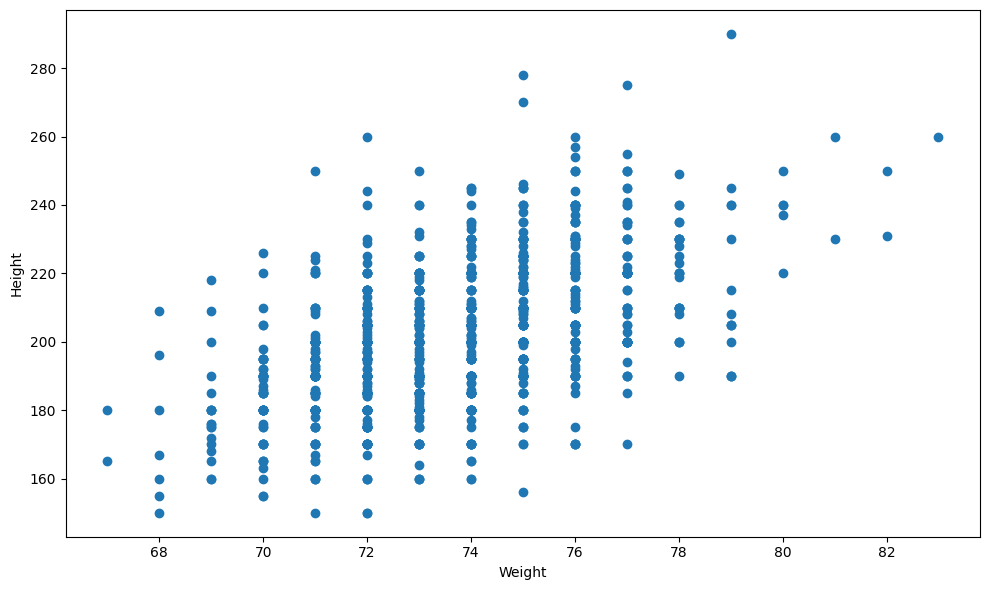

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## الخاتمة

في هذا الدفتر تعلمنا كيفية تنفيذ العمليات الأساسية على البيانات لحساب الوظائف الإحصائية. نحن الآن نعرف كيفية استخدام أدوات رياضية وإحصائية قوية لإثبات بعض الفرضيات، وكيفية حساب فترات الثقة لمتغيرات عشوائية بناءً على عينة بيانات.



---

**إخلاء المسؤولية**:  
تم ترجمة هذا المستند باستخدام خدمة الترجمة بالذكاء الاصطناعي [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو معلومات غير دقيقة. يجب اعتبار المستند الأصلي بلغته الأصلية هو المصدر الموثوق. للحصول على معلومات حاسمة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة ناتجة عن استخدام هذه الترجمة.
